In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

In [2]:
#importing Data set 
train = pd.read_csv('C:/Users/admin/OneDrive/Documents/Data Sciesnce Repository/Machine_Leaning_Projects/Insurance_Cross Selling Predection/Input/train.csv')
test = pd.read_csv('C:/Users/admin/OneDrive/Documents/Data Sciesnce Repository/Machine_Leaning_Projects/Insurance_Cross Selling Predection/Input/test.csv')

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [7]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Exploratory Data Analysis(EDA)

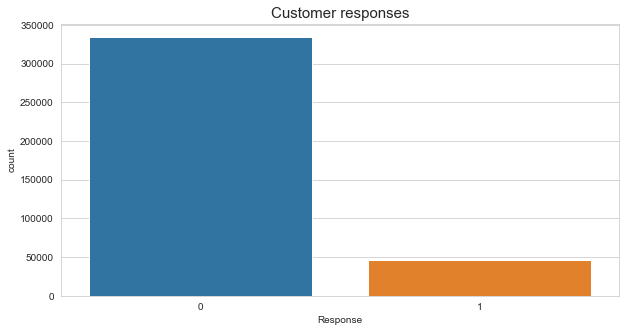

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(train['Response'])
plt.title('Customer responses', fontsize = 15)
plt.show()

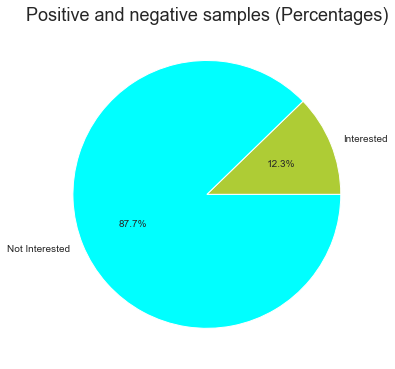

In [9]:
#Calculating positive and negative samples in percentages

positive_percent = len(train[train['Response'] == 1])/len(train)*100 
negative_percent = len(train[train['Response'] == 0])/len(train)*100
percentages = [positive_percent,negative_percent]

# Creating a pie chart
plt.figure(figsize = (6,8))
plt.pie(percentages, labels=['Interested','Not Interested'], autopct = '%.1f%%', colors = ['#aecc35', 'cyan'])
plt.title('Positive and negative samples (Percentages)', fontsize = 18)
plt.show()

This is a highly imbalanced dataset. The number of customers that actually took vehicle insurance is only 12.3% whereas the number of customers not interested is 87.7%

Let's explore the age of customers

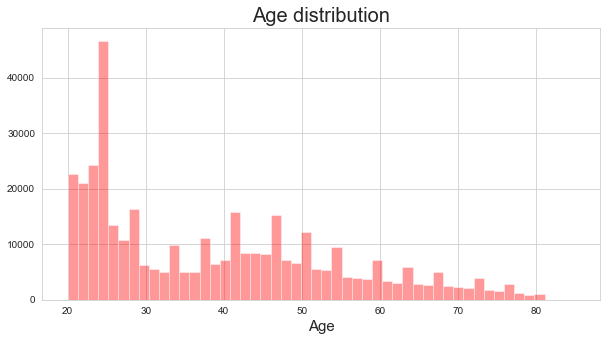

In [10]:
plt.figure(figsize = (10,5))
sns.distplot(train['Age'], kde = False, color = 'Red')
plt.xlabel('Age', fontsize = 15)
plt.title('Age distribution', fontsize = 20)
plt.show()

How many males or females actually got interested in taking the vehicle insurance?

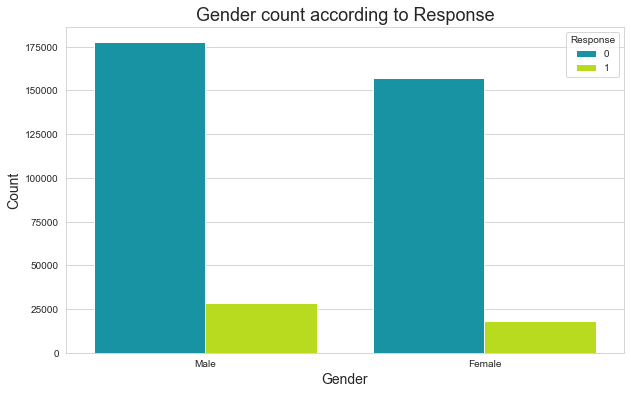

In [11]:
plt.figure(figsize = (10,6) )
sns.countplot(data = train, x = 'Gender', hue = 'Response', palette = 'nipy_spectral')
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Gender count according to Response', fontsize = 18)
plt.show()

How many customers have a driving license?

In [12]:
train['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

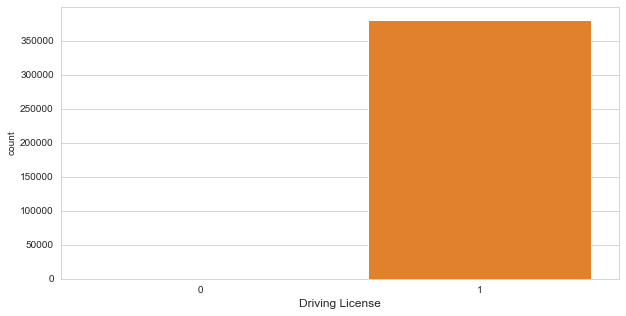

In [13]:
plt.figure(figsize = (10,5) )
sns.countplot(train['Driving_License'])
plt.xlabel('Driving License', fontsize = 12)
plt.show()

Age of vehicles already owned by customers and analyzing the responses of customers towards new vehicle insurance

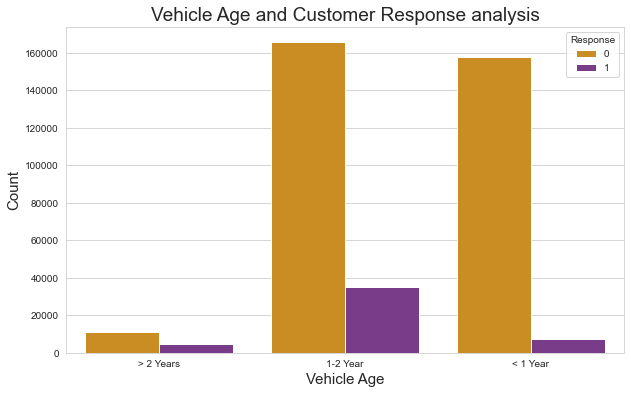

In [14]:
plt.figure(figsize = (10,6) )
sns.countplot(data = train, x = 'Vehicle_Age', hue = 'Response', palette='CMRmap_r')
plt.xlabel('Vehicle Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Vehicle Age and Customer Response analysis', fontsize = 19)
plt.show()

Customers that have vehicles between 1 and 2 years have shown interest in getting vehicle insurance.

Let's see if the vehicles that are between 1 and 2 years got damaged or not.

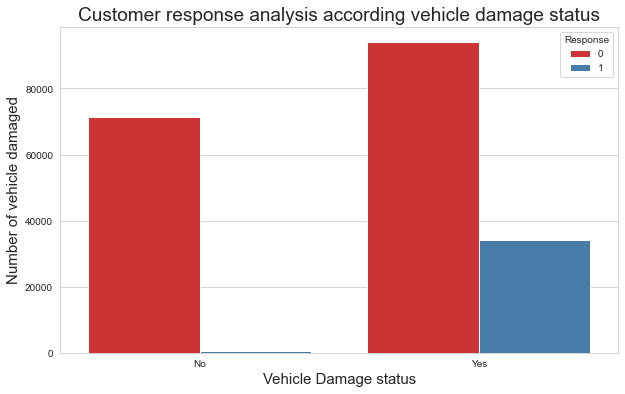

In [15]:
vehicles = train[train['Vehicle_Age'] == '1-2 Year']

plt.figure(figsize = (10,6) )
sns.countplot(data = vehicles, x = 'Vehicle_Damage', hue = 'Response', palette='Set1')
plt.xlabel('Vehicle Damage status', fontsize = 15)
plt.ylabel('Number of vehicle damaged', fontsize = 15)
plt.title('Customer response analysis according vehicle damage status', fontsize = 19)
plt.show()

As expected, those customers who have a damaged vehicle tend to take the vehicle insurance

Annual Premium distributiom

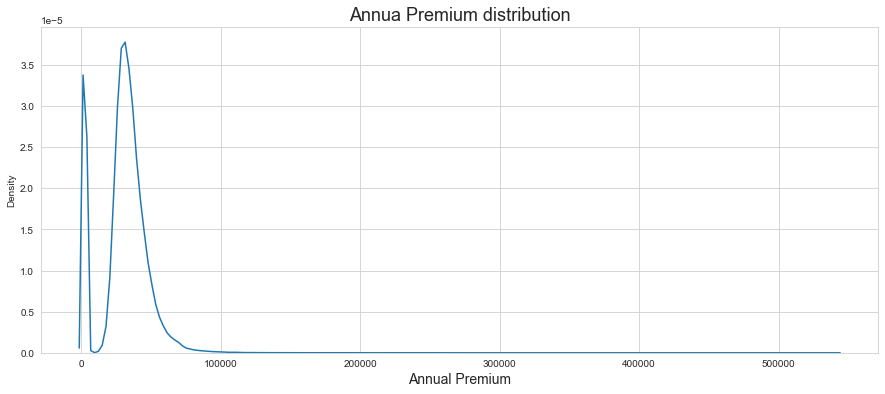

In [16]:
plt.figure(figsize=(15,6))
sns.kdeplot(train['Annual_Premium'])
plt.xlabel('Annual Premium', fontsize = 14)
plt.title('Annua Premium distribution', fontsize = 18)
plt.show()

Policy Sales distribution

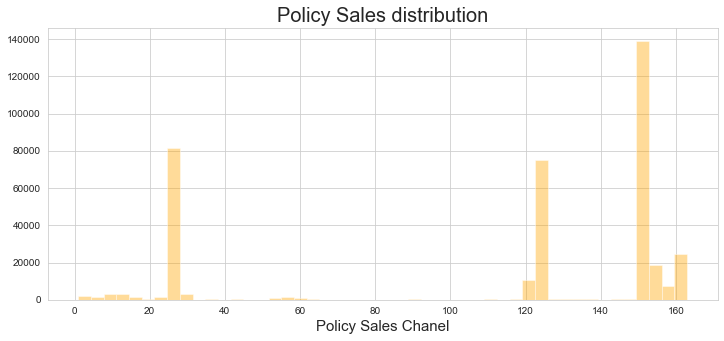

In [17]:
plt.figure(figsize = (12,5))
sns.distplot(train['Policy_Sales_Channel'], kde = False, color = 'orange')
plt.xlabel('Policy Sales Chanel', fontsize = 15)
plt.title('Policy Sales distribution', fontsize = 20)
plt.show()

The policy sales channel mainly contains two clusters of channels. They are mainly divided at 80. As they are of float type, it will be better to convert them into categorical and then one-hot encode them.

Region Code distribution

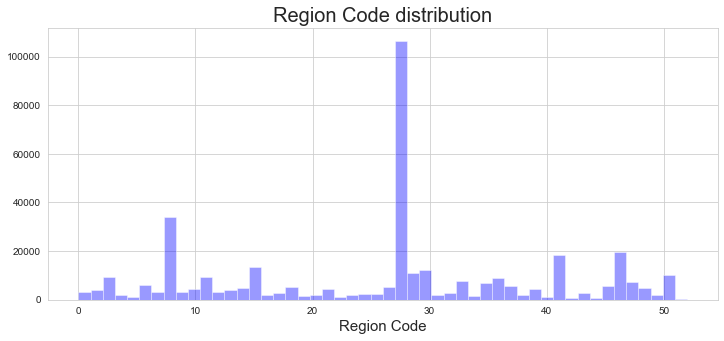

In [18]:
plt.figure(figsize = (12,5))
sns.distplot(train['Region_Code'], kde = False, color = 'blue')
plt.xlabel('Region Code', fontsize = 15)
plt.title('Region Code distribution', fontsize = 20)
plt.show()


The region code can also be clustered in three different categories.

It will be worth knowing if customers who previously had insurance would take another vehicle insurance.

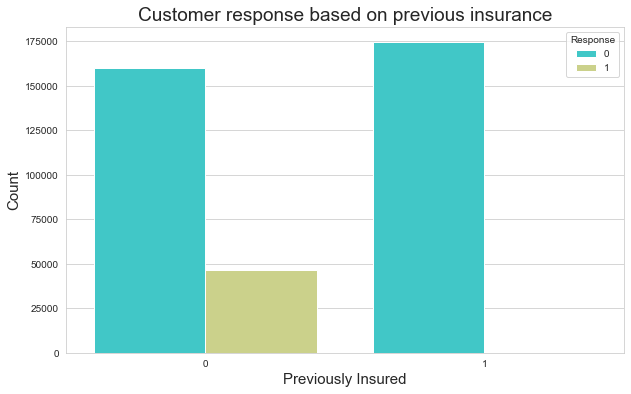

In [19]:
plt.figure(figsize = (10,6) )
sns.countplot(data = train, x = 'Previously_Insured', hue = 'Response', palette='rainbow')
plt.xlabel('Previously Insured', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Customer response based on previous insurance', fontsize = 19)
plt.show()

This is a key insight and useful to know that customers who already have an insurance won't take another insurance. That would be really hectic for them.

Correlation heatmap

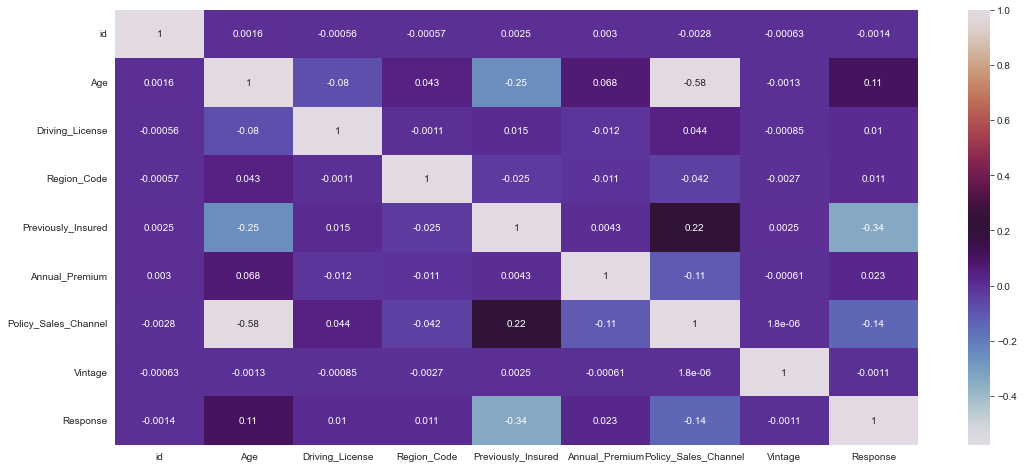

In [20]:
plt.figure(figsize = (18,8))
sns.heatmap(train.corr(), cmap = 'twilight', annot = True)
plt.show()

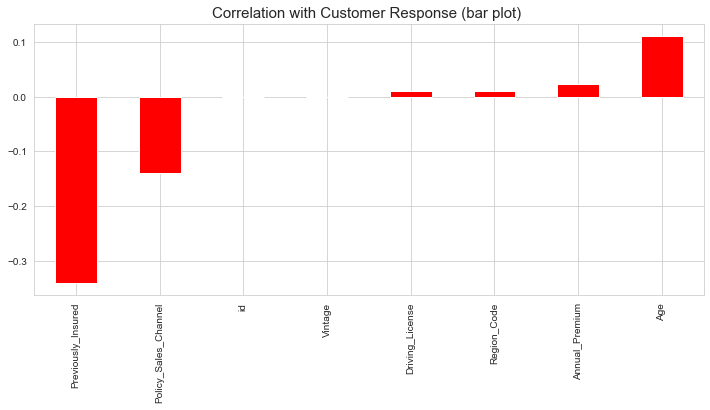

In [21]:
plt.figure(figsize=(12,5))
train.corrwith(train['Response']).sort_values().drop('Response').plot(kind='bar', color = 'red')
plt.title('Correlation with Customer Response (bar plot) ', fontsize= 15)
plt.show()

Vintage column has almost no correlation with Customer Response. That means a customer who is connected to the company for a long time does'nt necessarily mean that he/she will take the vehicle insurance.

##Data Preprocessing

Defining a function for preprocessing the data

In [22]:
def preprocessing(data):
     #Dropping null values
    data = data.dropna()
    
    #Dropping id
    data = data.drop('id', axis = 1)
    
    #Columns to get dummies
    cols = ['Gender', 'Vehicle_Damage', 'Vehicle_Age']
    
    #Changing categories into dummies
    data_dum = pd.get_dummies(data = data , columns = cols, drop_first = True )
    
    #We don't need this column as it has almost no correlation with our dependent variable
    data_dum = data_dum.drop('Vintage', axis = 1)
    
    return data_dum


In [23]:
#Preprocessing training data
train_dum = preprocessing(train)

#Preprocessing test data
test_dum = preprocessing(test)

In [24]:

inputs = train_dum.drop('Response', axis = 1)
targets = train_dum['Response'] 

x_test = test_dum.copy()

In [25]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix  

skf = StratifiedKFold(n_splits = 10)

for train_idx, val_idx in skf.split(inputs, targets):
    x_train, x_val = inputs.iloc[train_idx], inputs.iloc[val_idx]
    y_train, y_val = targets.iloc[train_idx], targets.iloc[val_idx]

In [26]:
#Scaling all input data
    
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)

#Will use only transform for validation and test data as we don't want any data leakage
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

Building Model

In [27]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

lgbm = LGBMClassifier(num_leaves = 30, max_depth = 5, n_estimators = 550, learning_rate = 0.05, objective = 'binary', 
                      lambda_l2 = 12,
                      max_bin = 100, metric = 'auc', is_unbalance = True, random_state = None, n_jobs = -1)
lgbm.fit(x_train_scaled,y_train)
y_val_pred = lgbm.predict_proba(x_val_scaled)[:,1]
print(roc_auc_score(y_val, y_val_pred))


0.8547719208593025


Making Predection on test dataset

In [28]:
y_pred = lgbm.predict_proba(x_test_scaled)[:,1]

Creating submisson file

In [29]:
my_submission = pd.DataFrame({'id': test.id, 'Response': y_pred})
#you could use any filename. We choose submission here
my_submission.to_csv('submission_lgbm.csv', index=False)

I got private leaderboard rank of 102th out of 21615 participants with this approach.



In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [31]:
model_LogReg = LogisticRegression(C=1.0)
model_LogReg.fit(x_train_scaled,y_train)
pred_LogReg = model_LogReg.predict(x_val_scaled)
class_rep_LR   = classification_report(y_val,pred_LogReg)
print(class_rep_LR)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     33439
           1       0.00      0.00      0.00      4671

    accuracy                           0.88     38110
   macro avg       0.44      0.50      0.47     38110
weighted avg       0.77      0.88      0.82     38110



In [32]:
y_pred = model_LogReg.predict_proba(x_test_scaled)[:,1]
my_submission = pd.DataFrame({'id': test.id, 'Response': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission_LR.csv', index=False)
#Your private score for this submission is : 0.8400223838618098,Had it been a live contest, your rank would be : 314

In [33]:
model_NB = MultinomialNB(alpha=0.7)
model_NB.fit(x_train_scaled,y_train)
pred_NB = model_NB.predict(x_val_scaled)
class_rep_NB    = classification_report(y_val,pred_NB)
print(class_rep_NB)


              precision    recall  f1-score   support

           0       0.89      0.97      0.92     33439
           1       0.30      0.10      0.15      4671

    accuracy                           0.86     38110
   macro avg       0.59      0.53      0.54     38110
weighted avg       0.81      0.86      0.83     38110



In [34]:
y_pred = model_NB.predict_proba(x_test_scaled)[:,1]
my_submission = pd.DataFrame({'id': test.id, 'Response': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission_NB.csv', index=False)
#Your private score for this submission is : 0.8098136434787152,Had it been a live contest, your rank would be : 328

In [35]:
model_DT = DecisionTreeClassifier()
model_DT.fit(x_train_scaled,y_train)
pred_DT = model_DT.predict(x_val_scaled)
class_rep_DT    = classification_report(y_val,pred_DT)
print(class_rep_DT)


              precision    recall  f1-score   support

           0       0.90      0.91      0.90     33439
           1       0.30      0.29      0.30      4671

    accuracy                           0.83     38110
   macro avg       0.60      0.60      0.60     38110
weighted avg       0.83      0.83      0.83     38110



In [36]:
y_pred = model_DT.predict_proba(x_test_scaled)[:,1]
my_submission = pd.DataFrame({'id': test.id, 'Response': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission_DT.csv', index=False)
#Your private score for this submission is : 0.61944969778401,Had it been a live contest, your rank would be : 481

In [37]:
model_RF = RandomForestClassifier()
model_RF.fit(x_train_scaled,y_train)
pred_RF = model_RF.predict(x_val_scaled)
class_rep_RF    = classification_report(y_val,pred_RF)
print(class_rep_RF)


              precision    recall  f1-score   support

           0       0.89      0.94      0.92     33439
           1       0.32      0.21      0.26      4671

    accuracy                           0.85     38110
   macro avg       0.61      0.57      0.59     38110
weighted avg       0.82      0.85      0.83     38110



In [38]:
y_pred = model_RF.predict_proba(x_test_scaled)[:,1]
my_submission = pd.DataFrame({'id': test.id, 'Response': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission_RF.csv', index=False)
#Your private score for this submission is : 0.815589054093937,Had it been a live contest, your rank would be : 328

In [39]:
model_5 = XGBClassifier()
model_5.fit(x_train_scaled,y_train)
pred_5 = model_5.predict(x_val_scaled)
cr5    = classification_report(y_val,pred_5)
print(cr5)


              precision    recall  f1-score   support

           0       0.88      1.00      0.93     33439
           1       0.48      0.02      0.04      4671

    accuracy                           0.88     38110
   macro avg       0.68      0.51      0.49     38110
weighted avg       0.83      0.88      0.82     38110



In [40]:
y_pred = model_5.predict_proba(x_test_scaled)[:,1]
my_submission = pd.DataFrame({'id': test.id, 'Response': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission_XGB.csv', index=False)
#Your private score for this submission is : 0.8613304683494184,Had it been a live contest, your rank would be : 243

In [41]:
model_CB = CatBoostClassifier(iterations=100)
model_CB.fit(x_train_scaled,y_train)
pred_CB = model_CB.predict(x_val_scaled)
classRep_CatBoost    = classification_report(y_val,pred_CB)
print(classRep_CatBoost)


Learning rate set to 0.5
0:	learn: 0.4494477	total: 272ms	remaining: 26.9s
1:	learn: 0.3610137	total: 355ms	remaining: 17.4s
2:	learn: 0.3191220	total: 453ms	remaining: 14.6s
3:	learn: 0.2976508	total: 548ms	remaining: 13.1s
4:	learn: 0.2858024	total: 785ms	remaining: 14.9s
5:	learn: 0.2781359	total: 1.03s	remaining: 16.2s
6:	learn: 0.2733955	total: 1.11s	remaining: 14.7s
7:	learn: 0.2706738	total: 1.2s	remaining: 13.8s
8:	learn: 0.2687905	total: 1.3s	remaining: 13.1s
9:	learn: 0.2677257	total: 1.36s	remaining: 12.2s
10:	learn: 0.2668214	total: 1.44s	remaining: 11.7s
11:	learn: 0.2664240	total: 1.54s	remaining: 11.3s
12:	learn: 0.2661556	total: 1.61s	remaining: 10.8s
13:	learn: 0.2659525	total: 1.68s	remaining: 10.3s
14:	learn: 0.2655935	total: 1.75s	remaining: 9.95s
15:	learn: 0.2653467	total: 1.86s	remaining: 9.79s
16:	learn: 0.2652495	total: 1.93s	remaining: 9.41s
17:	learn: 0.2651670	total: 1.99s	remaining: 9.08s
18:	learn: 0.2650130	total: 2.06s	remaining: 8.78s
19:	learn: 0.26488

In [42]:
y_pred = model_CB.predict_proba(x_test_scaled)[:,1]
my_submission = pd.DataFrame({'id': test.id, 'Response': y_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission_CB.csv', index=False)
#Your private score for this submission is : 0.8624799632738734,Had it been a live contest, your rank would be : 171